# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print type(prices)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

data.head(10)

<class 'pandas.core.series.Series'>
Boston housing dataset has 489 data points with 4 variables each.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200
5,6.430,5.21,18.7,602700
6,6.012,12.43,15.2,480900
7,6.172,19.15,15.2,569100
8,5.631,29.93,15.2,346500
9,6.004,17.10,15.2,396900


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [21]:
# for optimum speed, let's use numpy

# TODO: Minimum price of the data
#minimum_price = prices.min(0)
minimum_price = np.min(prices)

# TODO: Maximum price of the data
# maximum_price = prices.max(0)
maximum_price = np.max(prices)

# TODO: Mean price of the data
#mean_price = prices.mean(0)
mean_price = np.mean(prices)

# TODO: Median price of the data
#median_price = prices.median(0)
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
# std_price = prices.std(0)
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


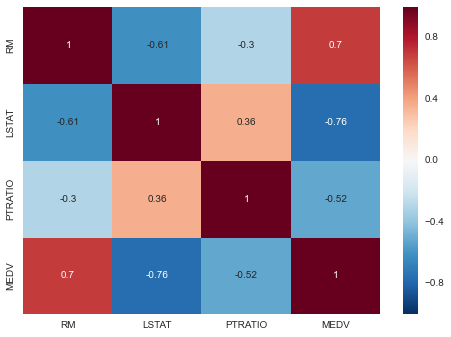

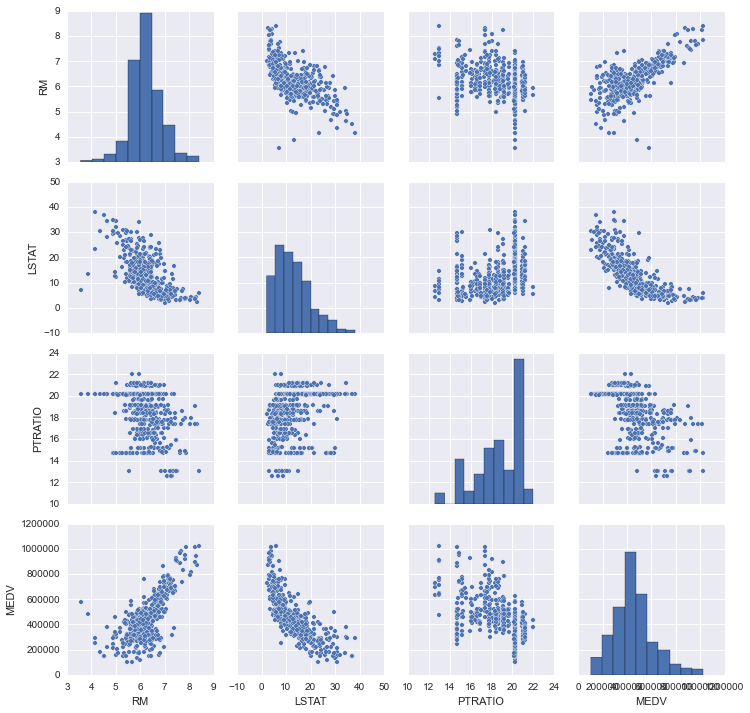

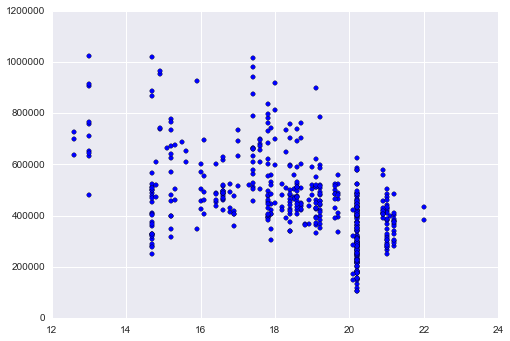

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
corr = data.corr()
 
# Heatmap
sns.heatmap(corr,annot=True)

sns.pairplot(data)
sns.plt.show()

# MEDV vs PTRATIO
plt.scatter(data.PTRATIO, data.MEDV)

#### References: 
<a href="http://blog.districtdatalabs.com/visual-diagnostics-for-more-informed-machine-learning-part-1">Visual diagnostics for more informed machine-learning</a>

<a href="https://elitedatascience.com/python-seaborn-tutorial#step-10">Python seaborn tutorial </a>

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

MEDV: Median Value of Owner Living homes

Would you expect a home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7?

-  Based on heatmap (RM Vs Prices - positive correlation) and pairplot (RM Vs Prices), it's very clear and easy to conclude that a home that has RM of 6 be worth **less** than a home that has an 'RM' value of 7 on most of the cases. For e.g RM increases, the home price increases.
- My experience in the real-world:  Increase in number of rooms correlates wuth higher prices because more rooms means more square feet, larger living space, increased living convenience, etc.

Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20?

-  Based on heatmap (LSTAT Vs Prices - negative correlation) and pairplot (LSTA Vs Prices), I can almost state that a home that an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth **more** than a neighborhood that has an 'LSTAT' value of 20. For e.g. LSTAT increases, the home price decreases.

- My experience in the real-world: The large percent of low income families correlate with lower prices because low income might end up with low maintenance of neighborhood, reduced spend on public places like parks, community halls etc. 

Would you expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an 'PTRATIO' value of 15?

- Here I can't take a call just based on heatmap & pairplot. So i just tried the simple scatter plot too...  Though it's not that clear but still I can conclude that a neighborhood that has an 'PTRATIO' value of 10 have home prices be worth **more** than a neighborhood that has an 'PTRATIO' value of 15. For e.g. PTRATIO increases, the home price decreases.
- My experience in the real-world: The large number of students per teacher correlate with lower prices because this high ratio is directly impacts the quality of the school, which is \#1 parameter for most of the families. And also high ratio impacts not only the education but also impacts the quality of extracurricular activities too.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [7]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true=y_true, y_pred=y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [8]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

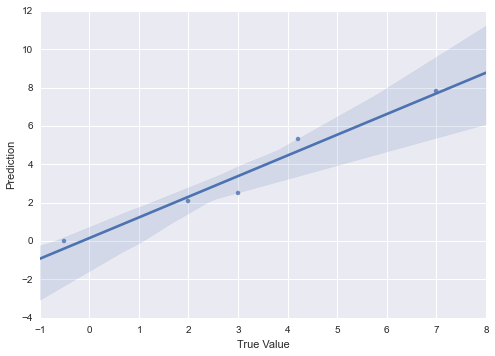

In [31]:
dataset = pd.DataFrame({'True Value':[3.0, -0.5, 2.0, 7.0, 4.2], 'Prediction':[2.5, 0.0, 2.1, 7.8, 5.3]})
sns.regplot(x = 'True Value', y = 'Prediction', data = dataset, fit_reg=True)

**Answer:**

Would you consider this model to have successfully captured the variation of the target variable?

- Yes

Why?

- As stated in the hint, ("R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable."), r2 score (92.3%) indicates that this model is capable of explaining 92.3% of the variance of the target variable.

What does this value represent?  
 R2 is mainly used to measure how a model fits the given data points. But still we should not go only by R2, because it doesn't give us the hypothesis test for the relationship between the model and the target variable.
 - The above regplot gives a reasonable relationship between True Value and Prediction. The slope is significantly steeper, which tells that when true value increases, there is a change in the Prediction. 
 - Again the R2 intrepretaion majorly depends on the units of the variables which we measure. For e.g. if the dependendent variable is constant over time(e.g. mean, variance,percentage differences, etc), then a R2 of high percentage is good. But whereas If the dependent variable is like a trending value, an R2 value very close to 1 (such as the 92.3\% in above case) is usually a bad sign rather than a good one.

####References:
[How High Should R-squared Be in Regression Analysis?](http://blog.minitab.com/blog/adventures-in-statistics-2/how-high-should-r-squared-be-in-regression-analysis)

[What’s a good value for R-squared?](https://people.duke.edu/~rnau/rsquared.htm)




### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [9]:
# TODO: Import 'train_test_split'

from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, train_size=0.80, random_state=50)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

The significance of having training & test data sets is mainly to train & evaluate the model (model generalization). For e.g. if we select a model for its accuracy only based on training data but not with test data, it can end up on overfitting. In other way on underfitting, we can understand that we dont have enough independent variables for the prediction.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

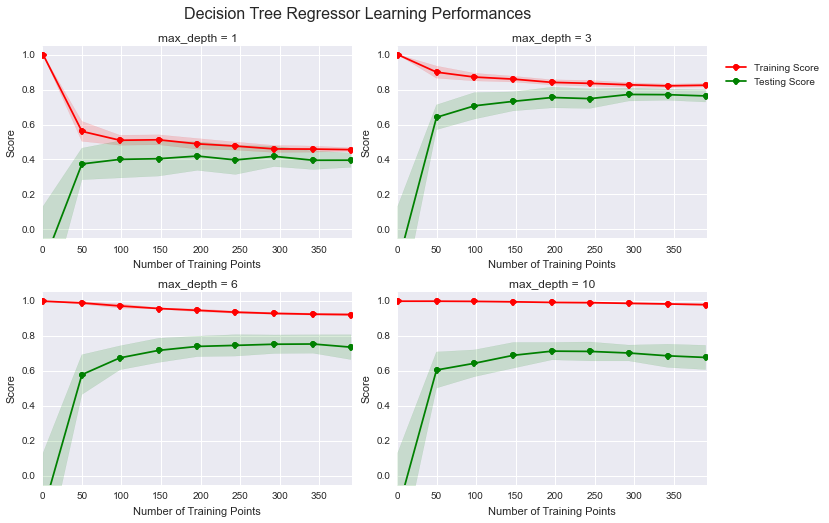

In [10]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

Choose one of the graphs above and state the maximum depth for the model.
 - I choose max_depth = 3
 
What happens to the score of the training curve as more training points are added? What about the testing curve?

- When we add more training points, training score slightly decreases whereas testing score increases sharply.

Would having more training points benefit the model?

- I dont think so. Because the training scoe (~0.8) & testing score(~0.8) are already flattened starting from 300 data points.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

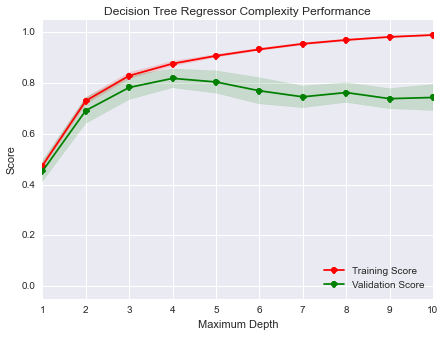

In [11]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
 
 - When the model is trained with a maximum depth of 1, the model suffers from high bias. Because High bias is a sign of underfitting (score = ~0.4).
 
How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

- When the model is trained with a maximum depth of 10, the model suffers from high variance. Because High variance is a sign of overfitting (score = ~1.0). Based on the graph, though the training score is ~1.0, the testing score is close to ~0.7, which clearly indicates that the model is overfitting on the training data set but well underperform on the test data set.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

Which maximum depth do you think results in a model that best generalizes to unseen data?

- I think maximum depth between 3 and 4, might result in a model that best generalizes to unseen data.

What intuition lead you to this answer?

-  On Graph, where the validation scores lie for the various depths that have been assigned to the model:  After 4, score goes worser.
- At what point do we get our best validation score without overcomplicating our model:  Almost max depth = 4.
- Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."  = Though training score increase after max depth = 4 but the testing score steadily decreases.


-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **
What is the grid search technique?

- Grid Search is an one of the function mainly used to optimize the hyperparameters. Grid search can be used to improvise a model's performance by tuning the right combination of hyperparameters. Though grid search is so powerful on achieving the perfect combination of parameters, it's also expensive  while considering computational resources. For e.g when we have no clue on a value of a hyperparameter, grid search can be optimized by trying with consecutive powers of 10 or a small value for a fine grained serach.

How it can be applied to optimize a learning algorithm?

- For e.g. we want to tune the RandomForestRegressor (params: n_estimators & max_features). Say, we want to start with as {"n_estimators": [10, 20 ,30], "max_features": [1,3,5,7]}. Now we have to evaluate 3 * 4 = 12 combinations of n_estimators & max_features. Suppose we use 10 fold cross validation, all these combination of hyperparameter are to be trained 10 times. So there will be 12 * 10 rounds of training and after all the training, grid search can give the optimal combination of parameters. (for e.g. grid_search.best_params_ : {"n_estimators": 20, "max_features": 5}


How do we evaluate each model and determine which hyperparameter values are best?

How do we “search” for the best combination of hyperparameters? Be more specific here.

- The model evaluation's main purpose is to choose between various models based on  model function, tuning parameters and features. We can use evaluation metric to measure a model's performance
 
 - For e.g. In Linear or Logistic Regression, the model parameters are such as weight coefficients, which can be optimized by some loss function. In case of RandomForest, the hyperparameters are such as n_estimators, max_features, max_depth, which are tuned by the data scientists thru algorithmic way.
  - While running a learning algorithm, various of combination of hyperparameter values can be tried over a training set to obtain different models. Then the best-performing model is being found out of the different models, called model selection.
- The actual dataset can be split into a training and a test set; Then we try out the various hyperparameter settings; The popular tuning methods are such as Randomized Search, the regular Grid Search and some more; For each hyperparameter configuration, the k-fold cross-validation is applied on each hyperparameter to achive different models and performance estimates; Choose the hyperparameter settings with respective to the best performing model; Fit the model on the complete training set; Make use of the test set to evaluate the best performing model; Fit the model to the actual dataset, now then the model is ready for the production purposes.


How does grid search help us optimize our model? (ie. Why do we care about hyperparameter values?)

It's always the case In using these two toolsK-fold & Gri Search is used together, mainly for:

1. Generate optimal datasets for testing
2. Find optimal hyperparameter settings.

As I mentioned above, try the various hyperparameter settings and obtain the best performing model's hyperparameter values using Grid Search. Now fit the model to the actual dataset and then the model is ready for the production purposes.




#### References: 
Python Machine Learning - Sebastian Raschka & Vahid Mirjalili



### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

What is the k-fold cross-validation training technique?

- In k-fold cross validation, we split the training dataset into k folds on random basis, where k -1 folds are to training the model, and the remaining one fold is to evaluate the performance. It is repeated for k times to esimate the perormance and mainly to obtain k models. The average performance of the models and performance estimates are calculated using the independent folds . The k-folds cross validation is mainly used for model tuning. In other words, K - folds can find the right values for the hyperparameters. And also using pipeline (sklearn.pipeline), vectorization can be made within each fold of cross-validation.

What benefit does this technique provide for grid search when optimizing a model?
- Training & Test data split is more flexible and faster.
- In case of out of sample performance, k - fold can be used to achieve a more accurate estimate.

#### References:

[cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [12]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dict_depth = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}
    params =  dict_depth
    
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [13]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

  I guessed the max depth can be between 3 and 4 based on the validation score. Now using the croos validation & Gridsearch, the model was trained and the parameters were tuned. Now the max depth for the optimal model is 4, where the max depth range was given from 1 to 10. I think i guessed almost right.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [14]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $404,911.11
Predicted selling price for Client 2's home: $212,223.53
Predicted selling price for Client 3's home: $938,053.85


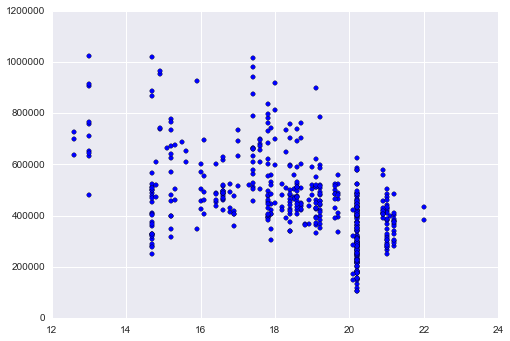

In [19]:
# MEDV vs RM
#plt.scatter(data.RM, data.MEDV)
# MEDV vs LSTAT
#plt.scatter(data.LSTAT, data.MEDV)
# MEDV vs PTRATIO
plt.scatter(data.PTRATIO, data.MEDV)

**Answer: **

Client 1's home's predicted price is \$404, 911. 
 - Based on the data exploration, for 5 bed rooms, LSTAT as 17%, PTRATIO as 15, most of the homes are in the range of 300k-400k. So this selling price is reasonably good.
 
  - The average price of 5 bed rooms home is around 300k only. The average price of homes for LSTAT as 17% is close to 400k.Though the average price of homes for PTRATIO as 15 is close to 600k, the bedrooms & LSTAT play major role and the price 400k is very much justifiable.

Client 2's home's predicted price is \$212, 223. 
 - Based on the data exploration, for 4 bed rooms, LSTAT as 32%, PTRATIO as 22, most of the homes are in the range of 800k-1 M. And the LSTAT is also high, where most of the homes are less than 200k. As per RM, this selling price is reasonably good.
   - The average price of 4 bed rooms home is around 200k only. The average price of homes for LSTAT as 32% is little above 150k.Though the average price of homes for PTRATIO as 22 is close to 400k, the LSTAT play major role and the price 200k is very much justifiable.

Client 3's home's predicted price is \$938, 053. 
  - Based on the data exploration, for 8 bed rooms, LSTAT as 3%, PTRATIO as 12, most of the homes are in the range of 100k-400k. With high bedrooms as well as the LSTAT and PTRATIO on the low range , so this selling price is reasonably good
     - The average price of 8 bed rooms home is little more than 800k. The average price of homes for LSTAT as 3% is around 700k. Nothing can be found on PTRATIO as 12, the RM & LSTAT play major role and the price 900k is very much justifiable.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [15]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **


The data collection of 1978 is not relevant today (2017). The inflation rate is almost doubled. 
  [Inflation Rate](https://inflationdata.com/Inflation/Inflation/DecadeInflation.asp). And also the features are not at all enough for the best model. The model should be trained on the features like square feet of the plot area, presence of pool or not, crime rate, school ranking, GDP and etc. Moreover the model is not robust enough, mainly it's just tuned for 3 parameters and the training data set is also not sufficient. Mostly it might underfit. The another concern is that urban city's data collection can't applied for rural cities. For e.g. rural city's prices are mostly on lesser than urban cities and also the dependent variable can be different. Though it's fair to judge the price of an individual home based on the characteristics of the entire neighborhood, but again it can be only to some extent. For e.g. better neighborhood (better schools & low crime rate) will defineitely boost the prices of a home while comparing to a similar home in bad neighborhood. In the same note, within same neighborhood, individual home's price can be predicted based on the same characteristics.
  
For these reasons, I will recommend that the constructed model should **not** be used in a real-world setting.




> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.